In [6]:
import pandas as pd
import numpy as np

In [7]:
def softmax(z):
    t=np.exp(z- np.max(z))
    return(t/(np.sum(t,axis=0))) # axis=0 sum column wise

In [8]:
def relu(z):
    return(np.maximum(z,0.0001))

In [9]:
def model():
    w1=np.random.rand(50,784)*np.sqrt(2/784)#50 784
    b1=np.full((50,1),0.001)
    w2=np.random.rand(25,50)*np.sqrt(2/50) #25 50
    b2=np.full((25,1),0.001)
    w3=np.random.rand(10,25)*np.sqrt(2/25)#10 25
    b3=np.full((10,1),0.001)
    parameters={"w1":w1,"w2":w2,"w3":w3,"b1":b1,"b2":b2,"b3":b3}
    return(parameters)

In [10]:
def forward(parameters,x_train):
    z1=(np.matmul(parameters["w1"],x_train)+parameters["b1"]) #50 100
    a1=relu(z1)
    z2=(np.matmul(parameters["w2"],a1)+parameters["b2"]) #25 100
    a2=relu(z2)
    z3=(np.matmul(parameters["w3"],a2)+parameters["b3"]) #10 100
    a3=softmax(z3)                                        #10 100
    cache={"z1":z1,"z2":z2,"z3":z3,"a1":a1,"a2":a2,"a3":a3}
    return(cache)

In [11]:
def cost(a,y_train,lambd,weight_sum,batch_size):
    cost=np.sum(np.multiply(y_train,np.log(a)))/batch_size+(lambd/(2*batch_size))*weight_sum
    return(cost)

In [12]:
def backward(x_train,y_train,parameters,cache,learning_rate,lambd,batch_size): 
    dz3=cache["a3"]-y_train #(10x100) 
    dw3=np.matmul(dz3,cache["a2"].T) #(10x25)
    db3=dz3
    
    dz2=np.matmul(parameters["w3"].T,dz3)
    dw2=np.matmul(dz2,cache["a1"].T) #25 50
    db2=dz2 
    
    dz1=np.matmul(np.matmul(parameters["w3"],parameters["w2"]).T,dz3)
    dw1=np.matmul(dz1,x_train.T) #50 784
    db1=dz1       
    
    cache2={"dw1":dw1,"dw2":dw2,"dw3":dw3,"db1":db1,"db2":db2,"db3":db3}
    for i in range(3):
        parameters["w"+str(i+1)]=parameters["w"+str(i+1)]-(learning_rate*(cache2["dw"+str(i+1)]+(lambd/batch_size)))#*parameters["w"+str(i+1)]))
        parameters["b"+str(i+1)]=parameters["b"+str(i+1)]-(learning_rate*cache2["db"+str(i+1)])
    
    return(parameters)

In [13]:
def train(x_train,y_train,batch_size):
    parameters=model()
    for j in range(10):
        for i in range(0,10000,batch_size):
            cache=forward(parameters,x_train[:,i:i+batch_size])
            weight_sum=np.sum(parameters["w3"])+np.sum(parameters["w2"])+np.sum(parameters["w1"])
            print(cost(cache["a3"],y_train[:,i:i+batch_size],0.8,weight_sum,batch_size))
            parameters=backward(x_train[:,i:i+batch_size],y_train[:,i:i+batch_size],parameters,cache,0.2,0.8,batch_size)
        

x_train.shape,y_train.shape
(784, 42000) (10, 42000)

In [16]:
df=pd.read_csv("MNIST dataset/train.csv")

In [17]:
X=np.array(df)
x_train,y_train=X[:,1:],X[:,0]

In [18]:
y_train=y_train.reshape((42000,1))
x_train=(x_train.T)/256
y_train=y_train.T+np.zeros((10,42000))
m=y_train[1]
print(x_train.shape,y_train.shape)

(784, 42000) (10, 42000)


In [19]:
y_train[:,6]
y_train1=np.zeros([10,42000])
for i in range(42000):
    k=int(y_train[0][i])
    y_train1[k][i]=1
y_train=y_train1

In [20]:
x_train/=256 #Preprocessing dataset

In [21]:
train(x_train,y_train,10)

43.764487642
17.7235386893
-8.34219858178
-34.350029814
-60.3852284935
-86.4801594887
-112.581386782
-138.632597391
-164.660004568
-190.680673899
-216.767744819
-242.692492205
-268.81567606
-294.835217542
-320.931560728
-346.876102251
-373.004202383
-399.054700112
-425.004208997
-451.12163771
-477.051100695
-503.254670753
-529.175117195
-555.386312239
-581.251229131
-607.461316251
-633.585257482
-659.563387427
-685.485755673
-712.022696933
-737.879456885
-763.893258245
-789.789867615
-815.97133817
-841.999268198
-867.993217872
-893.995363011
-920.270746562
-946.483415918
-972.195345882
-998.110202132
-1024.28383716
-1050.72534056
-1076.51752587
-1102.86507878
-1128.93657445
-1154.65116046
-1180.66025961
-1207.05964309
-1233.45239698
-1259.37602999
-1285.28881242
-1311.68779691
-1337.5496865
-1363.57557034
-1390.02022314
-1416.38464624
-1442.34227495
-1468.83319619
-1494.70899303
-1520.39676656
-1546.08865832
-1572.18795905
-1598.21057379
-1624.31144611
-1650.63154818
-1676.25617444
-17

-18235.2033264
-18263.0655175
-18291.4326791
-18318.6904333
-18343.7757117
-18372.5063238
-18396.0162517
-18424.9895745
-18452.7347042
-18479.4855543
-18505.9189232
-18534.3373124
-18561.5659169
-18586.651193
-18612.3998496
-18638.4664965
-18664.46371
-18692.6894354
-18722.7489019
-18750.8969671
-18780.0901106
-18808.1588786
-18832.7397582
-18859.7819352
-18887.5628592
-18912.4660517
-18941.1207134
-18968.6094948
-18997.3841135
-19022.3952484
-19048.7394419
-19079.1823021
-19107.9160907
-19139.6618567
-19169.0830465
-19196.3641189
-19224.2651332
-19251.8693155
-19277.6827729
-19304.9487235
-19331.3746444
-19356.9525728
-19384.0126067
-19414.4391213
-19442.0808623
-19469.88107
-19497.2493229
-19525.4405121
-19552.5850515
-19582.4665218
-19609.6831169
-19637.1856376
-19666.8424626
-19696.9392238
-19729.0787865
-19754.1332175
-19779.717521
-19810.9825532
-19840.1655896
-19863.5712487
-19892.6512601
-19923.8756199
-19953.4752559
-19984.3366196
-20009.5451667
-20038.5259281
-20066.3161294
-

-36235.0580104
-36265.4907095
-36293.5717986
-36320.9055252
-36351.7426501
-36377.1694314
-36408.8418734
-36430.5894733
-36466.801342
-36492.7706652
-36522.8898596
-36554.844686
-36575.4635147
-36602.070232
-36628.0744881
-36666.8036348
-36691.9662074
-36722.9980797
-36755.514588
-36789.0381424
-36818.6210986
-36847.898172
-36870.4699669
-36894.9924176
-36925.2098231
-36951.4204272
-36978.3812043
-37015.1147227
-37045.7008616
-37074.4946731
-37096.0105374
-37129.8170693
-37163.1177343
-37194.8680495
-37221.4768651
-37252.1742746
-37275.152252
-37302.1679841
-37333.3403189
-37353.5991482
-37386.5536873
-37416.7150597
-37448.1105855
-37468.5878806
-37490.022255
-37520.1198753
-37545.5070729
-37579.2378802
-37610.5372907
-37633.7370387
-37664.4284383
-37699.4119854
-37733.1383364
-37761.0733238
-37782.9187142
-37817.7165169
-37839.6281326
-37864.5007077
-37896.4728537
-37922.2495539
-37950.9863189
-37978.0511426
-38008.1271051
-38038.8719145
-38068.4502718
-38094.2781561
-38121.3625055
-3

-58331.8944104
-58362.1270214
-58393.3719726
-58412.4983002
-58454.2042607
-58482.1322313
-58507.7593552
-58544.3860401
-58566.141513
-58595.6778406
-58623.5907797
-58661.3942159
-58685.3332766
-58717.3622187
-58751.9705565
-58789.1457257
-58816.1429815
-58861.5793709
-58894.9808132
-58927.3798358
-58956.3248775
-58980.8164888
-59018.2659914
-59050.7264482
-59083.7895079
-59118.3003457
-59137.2884874
-59172.3378745
-59200.6152729
-59228.1539471
-59250.7770334
-59286.7022915
-59318.388403
-59342.8365416
-59378.0170964
-59409.9822557
-59441.8487164
-59467.849997
-59492.4471477
-59524.8897922
-59554.8678997
-59581.0343533
-59612.6677875
-59650.0211281
-59670.9198331
-59702.6165638
-59731.1468291
-59765.7486884
-59798.046388
-59835.079869
-59866.4926976
-59896.8419824
-59917.8899026
-59959.3349983
-59976.5458993
-60006.5991222
-60041.8873392
-60074.7328245
-60104.8933066
-60134.1426832
-60169.5542169
-60198.1232531
-60218.1364544
-60251.0461646
-60277.1676276
-60306.0677163
-60339.6914329


-78648.6079526
-78682.4904301
-78710.3148514
-78742.2161509
-78788.7791377
-78815.2487518
-78838.3801854
-78860.9864206
-78890.1080592
-78926.2093259
-78970.9506101
-79012.6918495
-79051.0889678
-79096.1305868
-79132.8766891
-79155.1547283
-79196.0483465
-79229.6066739
-79254.7812662
-79294.5993024
-79332.9235201
-79374.6793653
-79392.8295196
-79420.8220589
-79465.814324
-79509.1552075
-79558.1259493
-79602.5227313
-79637.2270362
-79676.4515234
-79714.250712
-79739.2896229
-79763.3573809
-79792.62766
-79819.3976336
-79849.550063
-79901.0313282
-79933.9202438
-79964.6727819
-79995.6936969
-80031.2761533
-80061.7469676
-80106.2846707
-80139.2787868
-80171.9463844
-80211.2807178
-80252.7591679
-80301.058356
-80316.9735905
-80347.3953426
-80399.361868
-80437.9532864
-80459.4687276
-80499.9268909
-80551.1155961
-80599.6523449
-80647.1174317
-80677.5371393
-80719.2480891
-80753.1644823
-80787.4141382
-80835.2850987
-80877.3129703
-80886.8997869
-80948.4001639
-80964.1941436
-80993.9861581
-8

-98962.1773646
-98997.1040526
-99047.532055
-99061.5304903
-99110.8239145
-99128.6394198
-99156.2541726
-99199.4776256
-99240.1792184
-99279.7267148
-99285.4332791
-99326.386629
-99373.9529803
-99400.6400684
-99441.5345969
-99482.4253492
-99490.7582535
-99535.2670458
-99579.7285257
-99635.175181
-99656.7044303
-99697.4959039
-99735.8692779
-99779.7709458
-99836.3217762
-99893.4584937
-99942.7807106
-99967.3010463
-99996.0292225
-100040.466223
-100074.372835
-100121.23506
-100135.141993
-100168.441341
-100214.657586
-100259.186313
-100314.060236
-100372.853577
-100420.171483
-100458.781419
-100504.199975
-100567.753333
-100613.994596
-100650.610575
-100683.580246
-100703.957295
-100746.245432
-100789.060965
-100838.107968
-100861.315848
-100908.681504
-100970.778742
-101010.518388
-101043.992921
-101075.845465
-101117.917035
-101138.77292
-101187.029322
-101199.743482
-101260.874877
-101287.725264
-101327.645739
-101376.69807
-101383.690874
-101409.603474
-101434.49068
-101504.920698
-1

-122471.495225
-122527.379551
-122575.061241
-122615.741328
-122675.163085
-122690.342467
-122710.654081
-122771.980414
-122809.478192
-122838.110983
-122867.493124
-122920.789638
-122947.67206
-122983.490042
-123013.172106
-123064.494783
-123090.453461
-123155.537541
-123182.321973
-123212.94927
-123249.465327
-123272.644626
-123302.800283
-123373.310851
-123423.177132
-123457.931314
-123528.766627
-123573.071342
-123631.759814
-123654.296158
-123696.77079
-123762.860057
-123815.280125
-123847.843779
-123873.165572
-123943.372185
-124012.886302
-124030.953532
-124097.179194
-124146.056867
-124176.211459
-124221.83149
-124252.708116
-124271.38147
-124325.625911
-124398.864348
-124450.36731
-124506.145386
-124549.916079
-124598.816742
-124623.682304
-124658.271546
-124708.652636
-124760.058612
-124797.045702
-124836.257535
-124895.12423
-124929.583142
-124956.236276
-124990.599185
-124996.734586
-125028.480606
-125051.659875
-125086.243427
-125142.168744
-125186.11053
-125233.251873
-12

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

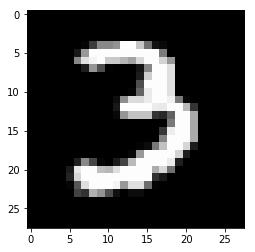

In [22]:
#To view any image
import matplotlib.pyplot as plt
pixel=(x_train[:,9].reshape((784,1))).reshape((28,28))
plt.imshow(pixel,cmap='gray')
plt.figure(figsize=(50,50))
plt.show()